We are now ready to introduce a "real" computer, the LC-3. 

To be more nearly exact, we are ready to introduce the instruction set architecture (ISA) of the LC-3. 

**Recall: the ISA is the interface between what the software commands and what the hardware actually carries out**

In this chapter and in Chapters 8 and 9, we will point out the important features of the ISA of the LC-3. You will need these features to write programs in the LC-3's own language, that is, in the LC-3's machine language. 

## 5.1 The ISR: Overview 
**The ISA specifies all the information about the computer that the software has to be aware of**

**In other words, the ISA specifies everything in the computer that is available to a programmer when he/she writes programs in the computer's own machine language**

Thus, the ISA also specifies everything in the computer that is available to someone who wishes to translate programs written in a high-level language like C or Pascal, etc into the machine language of the computer. 

The ISA specifies the memory organization, register set, and instruction set, including opcodes, data types, and addressing modes.

### 5.1.1 Memory Organization 
- The LC-3 memory has an address space of 2^16 (i.e., 65,536) locations, and an addressability of 16 bits.
- Not all 65,536 addresses are actually used for memory locations (ch. 8)
- Since the normal unit of data that is processed in the LC-3 is 16 bits, we refer to 16 bits as one word, and we say the LC-3 is word-addressable.

### 5.1.2 Registers 
Since it usually takes far more than one machine cycle to obtain data from memory, the LC-3 provides (like almost all computers) additional temporary storage locations that can be accessed in a single machine cycle. 

The most **common type of temporary storage** locations and the one used in the LC-3 is the general purpose **register set**.
- Each register in the set is called a general purpose register (GPR).
- Registers have the same property as memory locations in that they are used to store information that can be retrieved later.
- The number of bits stored in each register is usually one word. In the LC-3, this means 16 bits.

Registers must be uniquely identifiable. The LC-3 specifies eight GPRs, each identified by a 3-bit register number - referred to as R0,...,R7.

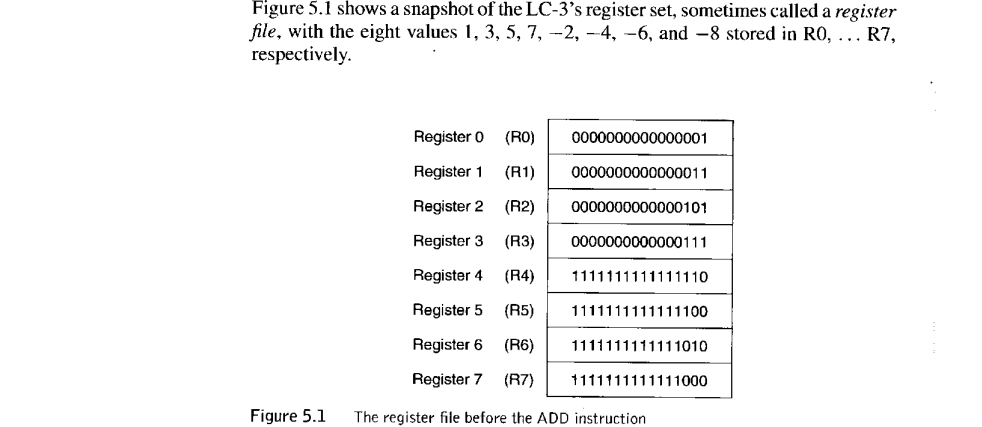

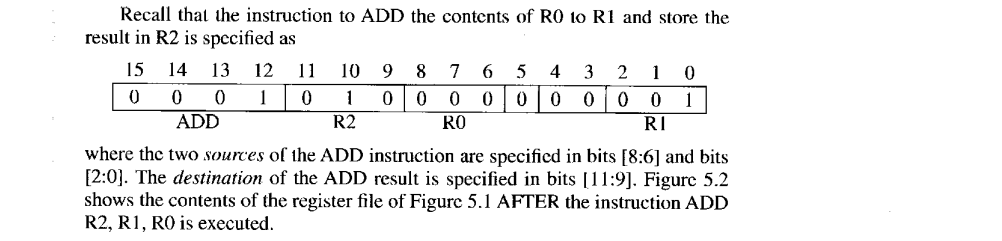

### 5.1.3 The Instruction Set 
made up of two things, its **opcode** (what the instruction is asking the computer to do) and its **operands** (who the computer is expected to do it to).

- The instruction set of an ISA is defined by its set of opcodes, data types, and addressing modes. 
- The addressing modes determine where the operands are located. 

### 5.1.4 Opcodes 
Some IS As have a very large set of opcodes, one for each of a large number of tasks that a program may wish to carry out. Other IS As have a very small set of opcodes. 

The decision as to which instructions to include or leave out of an ISA is usually a hotly debated topic in a company when a new ISA is being specified. 

The LC-3 ISA has 15 instructions, each identified by its unique opcode. The opcode is specified by bits [15:12] of the instruction.

Since four bits are used to specify the opcode, 16 distinct opcodes are possible. However, the LC-3 ISA specifies only 15 opcodes. The code 1101 has been left unspecified, reserved for some future need that we are not able to anticipate today. 

**There are three different types of instructions, which means three different
types of opcodes:** 
- **Operate** instructions process information. 
- **Data movement** instructions move information between memory and the registers and between registers/memory and input/output devices. 
- **Control** instructions change the sequence of instructions that will be executed. 

### 5.1.5 Data Types 
**A data type is a representation of information such that the ISA has opcodes that operate on that representation.**

If the ISA has an opcode that operates on information represented by a data type, then we say the ISA supports that data type.

### 5.1.6 Addressing Modes 
- mechanism for specifying where the operand is located
- An operand can generally be found in one of three places: in memory, in a register, or as a part of the instruction.

### 5.1.7 Condition Codes 
Almost all ISAs allow the instruction sequencing to change on the basis of a previously generated result.

- The LC-3 has three single-bit registers that are set (set to 1) or cleared (set to 0) each time one of the eight general purpose registers is written. 
- The three single-bit registers are called N9 Z, and P, corresponding to their meaning: negative, zero, and positive. 
- Each time a GPR is written, the N, Z, and P registers are individually set to 0 or 1, corresponding to whether the result written to the GPR is negative, zero, or positive. 
    - That is, if the result is negative, the N register is set, and Z and P are cleared. 
    - If the result is zero, Z is set and N and P are cleared. 
    - Finally, if the result is positive, P is set and N and Z are cleared. 


## 5.2 Operate Instructions 
**Operate instructions process data.**

Arithmetic operations (like ADD, SUB, MUL, and DIV) and logical operations (like AND, OR, NOT, XOR) are common examples. 

The LC-3 has three operate instructions: ADD, AND, and NOT. 

## 5.3 Data Movement Instructions 
Data movement instructions move information between the general purpose registers and memory, and between the registers and the input/output devices

We will ignore for now the business of moving information from input devices to registers and from registers to output devices (ch. 8/9)

In this chapter, we will confine ourselves to moving information between memory and the general purpose registers. 

**The process of moving information from:**
- memory to a register is called a **load**
- register to memory is called a **store**

The LC-3 contains seven instructions that move information: LD, LDR, LDI, LEA, ST, STR, and STI.
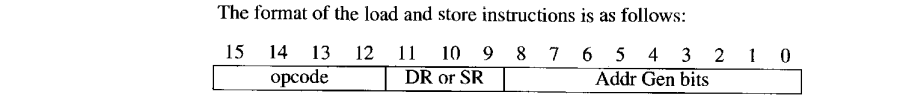

Data movement instructions require two operands, a **source** and a **destination**. The source is the data to be moved; the destination is the location where it is moved to.

Bits [11:9] specify one of these operands, the register. If the instruction is a load, DR refers to the destination register that will contain the value after it is read from memory (at the completion of the instruction cycle). If the instruction is a store, SR refers to the register that contains the value that will be written to memory. 

### 5.3.1 PC-Relative Mode 
LD (opcode = 0010) and ST (opcode = 0011) specify the PC-relative addressing mode.

### 5.3.2 Indirect Mode 
LDI (opcode — 1010) and STI (opcode = 1011) specify the indirect addressing mode. An address is first formed exactly the same way as with LD and ST.

However, instead of this address **being** the address of the operand to be loaded or stored, it **contains** the address of the operand to be loaded or stored.

### 5.3.3 Base+offset Mode
LDR (opcode = 0110) and STR (opcode = 0111) specify the Base+offset addressing mode. The Base+offset mode is so named because the address of the operand is obtained by adding a sign-extended 6-bit offset to a base register

Note that the Base+offset addressing mode also allows the address of the operand to be anywhere in the computer's memory. 

### 5.3.4 Immediate Mode 
The fourth and last addressing mode used by the data movement instructions is the immediate (or, literal) addressing mode. It is used only with the load effective address (LEA) instruction. LEA (opcode =1110) loads the register specified by bits [11:9] of the instruction with the value formed by adding the incremented program counter to the sign-extended bits [8:0] of the instruction. 

The immediate addressing mode is so named because the operand to be loaded into the destination register is obtained immediately, that is, without requiring any access of memory.

## 5.4 Control Instructions 
change the sequence of the instructions that are executed. 

If there were no control instructions, the next instruction fetched after the current instruction finishes would be the instruction located in the next sequential memory location - because the PC is incremented in the FETCH phase of each instruction.

**The LC-3 has five opcodes that enable this sequential flow to be broken:**
- conditional branch
- unconditional jump
- subroutine (sometimes called function) call
- TRAP
- return from interrupt

The TRAP instruction is particularly useful because, among other things, it allows a programmer to get information into and out of the computer without fully understanding the intricacies of the input and output devices.

### 5.4.1 Conditional Branches 
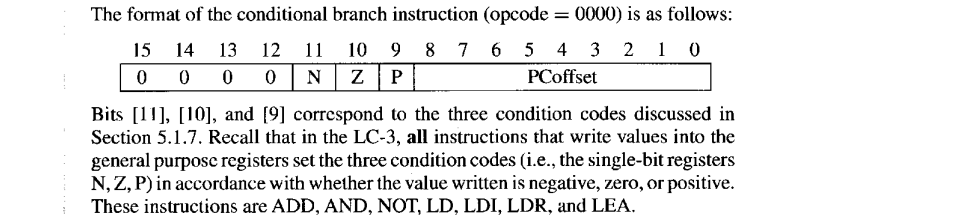

The condition codes are used by the conditional branch instruction to determine whether to change the instruction flow; that is, whether to depart from the usual sequential execution of instructions that we get as a result of incrementing PC during the FETCH phase of each instruction. 

If any of the condition codes that are examined are in state 1, then the PC is loaded with the address obtained in the EVALUATE ADDRESS phase.

If none of the condition codes that are examined are in state 1, the PC is left unchanged. In that case, in the next instruction cycle, the next sequential instruction will be fetched.

### 5.4.3 Two Methods for Loop Control
We use the term loop to describe a sequence of instructions that get executed again and again under some controlling mechanism.

Each time the loop body executes is called one iteration of the loop. 

There are two common methods for controlling the number of iterations of a loop
- use of a counter
- use of a sentinel

### 5.4.5 The JMP Instruction 
The conditional branch instruction, for all its capability, does have one unfortunate limitation. 

The next instruction executed must be within the range of addresses that can be computed by adding the incremented PC to the sign-extended offset obtained from bits [8:0] of the instruction.

Why Use JMP?
- Flexibility: It allows jumps to any address in the LC-3’s full memory range, overcoming the 9-bit offset limitation of conditional branches.
- Use Case: JMP is essential for executing instructions located far from the current instruction, especially in large programs.

### 5.4.6 The TRAP Instruction 
The TRAP (opcode = 1111) instruction **changes the PC to a memory address that is part of the operating system so that the operating system will perform some task in behalf of the program that is executing**.
- the TRAP instruction invokes an operating system SERVICE CALL
- Bits `[7:0]` of the TRAP instruction form the trapvector, which identifies the service call that the program wishes the operating system to perform

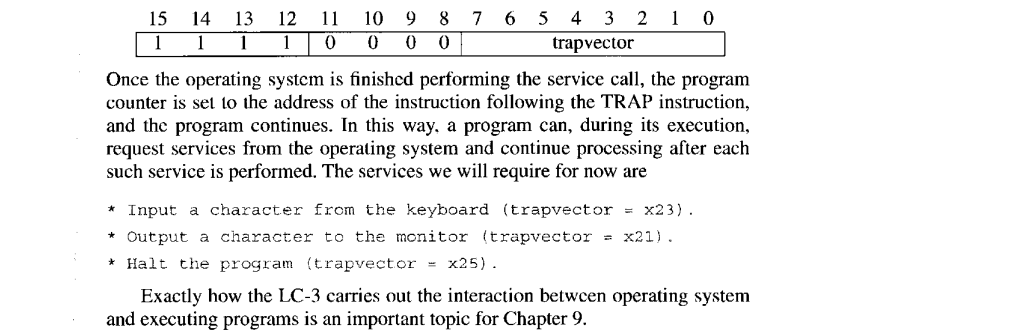

## 5.5 Another Example: Counting Occurrences of a Character 
### 5.6.1 Basic Components of the Data Path
##### The Global Bus 
the heavy black structure with arrowheads at both ends represents the data path's global bus
- The LC-3 global bus consists of 16 wires and associated electronics
- It allows one structure to transfer up to 16 bits of information to another structure by making the necessary electronic connections on the bus.
- Exactly one value can be transferred on the bus at one time.
    - Note that each structure that supplies values to the bus has a triangle just behind its input arrow to the bus. This triangle (called a tri-state device) allows the computer's control logic to enable exactly one supplier to provide information to the bus at any one time
- Not all computers have a single global bus. The pros and cons of a single global bus is yet another topic

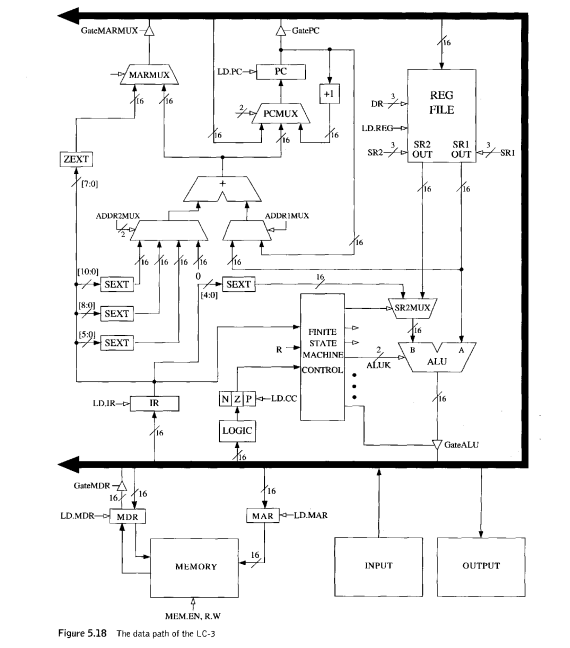

##### Memory
One of the most important parts of any computer is the memory that contains both instructions and data. 

Memory is accessed by loading the memory address register (MAR) with the address of the location to be accessed.

If a load is being performed, control signals then read the memory, and the result of that read is delivered by the memory to the memory data register (MDR). 

On the other hand, if a store is being performed, the data to be stored is first loaded into the MDR. Then the control signals specify that WE is asserted in order to store into that memory location. 

##### The ALU and the Register File 
The ALU is the processing element. 

Takes two inputs:
- Source 1 (from a register, controlled by the SRI field).
- Source 2 (from another register SR2 or a sign-extended immediate value, determined by bit [5] of the instruction).

Performs operations and outputs results to:
- 16-bit Bus: Writes back to the destination register (DR).
- Condition Codes (N, Z, P): Indicates if the result is negative, zero, or positive.

Control Logic: Bit [5] selects between a register and an immediate value for source 2.

##### PC (Program Counter) and PCMUX (Program Counter Multiplexer):

**Program Counter (PC):**
- Holds the address of the next instruction.
- Supplies this address via the global bus to the Memory Address Register (MAR) during the fetch phase.

**PCMUX:**
- Chooses the PC's input:
    - Incremented PC for normal sequential instructions.
    - PC + offset for conditional branches (if taken).
    - Data from the global bus for other control instructions.
- A special adder computes the PC + offset, not the ALU.

##### MARMUX (Memory Address Register Multiplexer):

- Supplies the MAR with the correct address for memory operations.
Inputs to MARMUX:
- Right Input: Adds either the incremented PC or a base register to a literal value or zero (depends on opcode and control signals).
- Left Input: Supplies a zero-extended trapvector for service calls like TRAP instructions.

### Instruction Cycle Steps:

**Fetch:**
- Load the PC into MAR.
- Increment PC and store it back.
- Read memory at the MAR address into MDR.
- Move MDR content to Instruction Register (IR).

**Decode:**
- Interpret the instruction in the IR.
- Generate control signals for subsequent processing.
- Example: For `LDR`, determine base+offset addressing mode.

**Evaluate Address:**
- Calculate the memory address using:
  - Base register contents (selected via `ADDR1MUX`).
  - Offset (sign-extended bits from the instruction, selected via `ADDR2MUX`).

**Operand Fetch:**
- Access memory to load data at the calculated address into the MDR.

**Execute:**
- Skip this phase if not required (e.g., `LDR` doesn't need it).

This detailed control flow ensures precise handling of instructions, from fetching to execution, leveraging components like the ALU, PC, and multiplexer-based address generation.